<a href="https://colab.research.google.com/github/babluu1617/2303a51177/blob/main/Lab%2008.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:320: UserWarning: Multiple active versions of the dataset matching the name car exist. Versions may be fundamentally different, returning version 2. Available versions:
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=991
- version 3, status: active
  url: https://www.openml.org/search?type=data&id=40975

  warn(warning_msg)


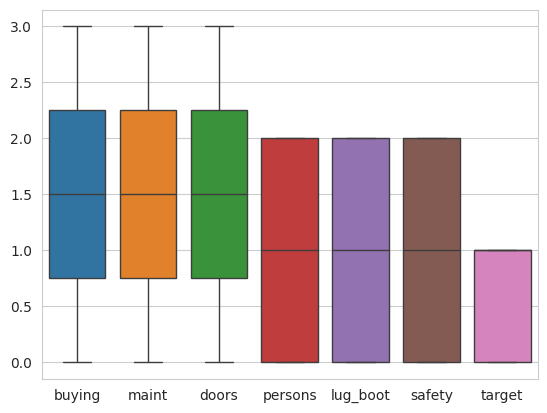

Best Parameters: {'clf__criterion': 'entropy', 'clf__max_depth': 10, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2}
Best Cross-Validation Score: 0.99090223243373
Test Accuracy: 0.9845857418111753
Confusion Matrix:
 [[159   2]
 [  6 352]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       161
           1       0.99      0.98      0.99       358

    accuracy                           0.98       519
   macro avg       0.98      0.99      0.98       519
weighted avg       0.98      0.98      0.98       519



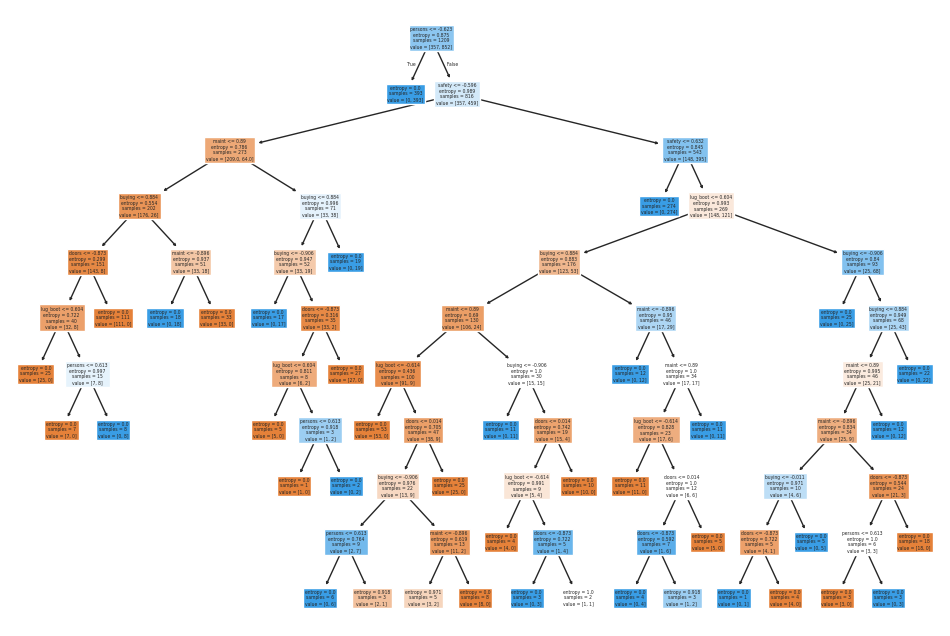

Improved Accuracy: 0.9845857418111753
Improved Confusion Matrix:
 [[159   2]
 [  6 352]]
Improved Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       161
           1       0.99      0.98      0.99       358

    accuracy                           0.98       519
   macro avg       0.98      0.99      0.98       519
weighted avg       0.98      0.98      0.98       519



In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml

data = fetch_openml('car')
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target

le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])

df.describe()

sns.boxplot(data=df.iloc[:, :10])
plt.show()

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', DecisionTreeClassifier())
])

param_grid = {
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_depth': [2, 4, 6, 8, 10],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_}")

y_pred = grid_search.best_estimator_.predict(X_test)

print("Test Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred))
print("Classification Report:\n", metrics.classification_report(y_test, y_pred))

plt.figure(figsize=(12, 8))
plot_tree(grid_search.best_estimator_['clf'], filled=True, feature_names=X.columns)
plt.show()

y_pred_gs = grid_search.predict(X_test)
print("Improved Accuracy:", metrics.accuracy_score(y_test, y_pred_gs))
print("Improved Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred_gs))
print("Improved Classification Report:\n", metrics.classification_report(y_test, y_pred_gs))
